In [1]:
import numpy as np
from signum import TimeDomainSignal

## Time domain signals

In [2]:
# define constants: signal size & sampling frequency
SIZE = 1000
FS = 100

### Real-valued signals

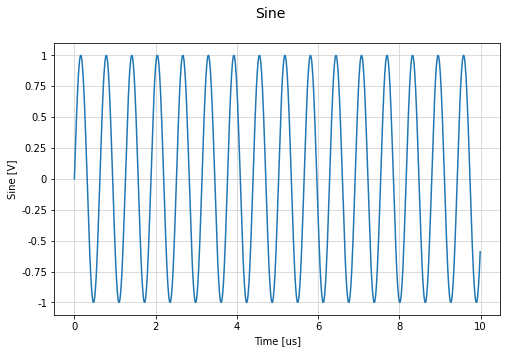

(<Figure size 576x360 with 1 Axes>,
 array([<AxesSubplot:xlabel='Time [us]', ylabel='Sine [V]'>], dtype=object))

In [3]:
# Signal 1
s1 = np.sin(np.arange(SIZE)*0.1)
s1 = TimeDomainSignal(s1, description='Sine', unit='V', f_sampling=FS, f_sampling_unit='MHz')
s1.display()

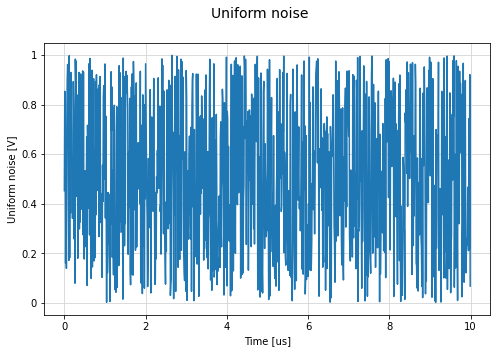

(<Figure size 576x360 with 1 Axes>,
 array([<AxesSubplot:xlabel='Time [us]', ylabel='Uniform noise [V]'>],
       dtype=object))

In [4]:
# Signal 2
s2 = TimeDomainSignal(np.random.rand(SIZE), description='Uniform noise', unit='V', f_sampling=FS, f_sampling_unit='MHz')
s2.display()

#### Sum of two signals

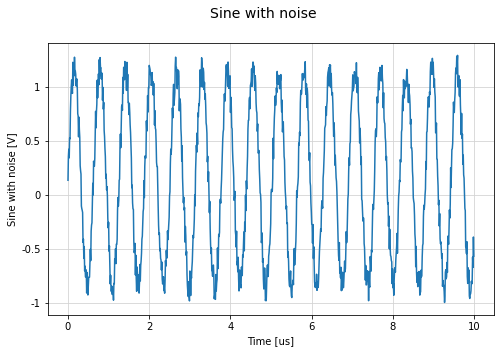

(<Figure size 576x360 with 1 Axes>,
 array([<AxesSubplot:xlabel='Time [us]', ylabel='Sine with noise [V]'>],
       dtype=object))

In [5]:
s12 = s1 + 0.3*s2
s12.description = "Sine with noise"
s12.display()

#### Matching core attributes requirement
If certain attributes, such as the sampling frequency, do not match, it is impossible to perform operations such as addition

In [6]:
s3 = TimeDomainSignal(np.arange(SIZE), f_sampling=FS/2, description="Sampling freqmismatch")
try:
    s23 = s2 + s3
except TypeError as e:
    print(e)

Inputs attributes mismatch! ({'unit': 'V', 'x_unit': 's', '_base_resolution': 1, '_t_sampling': 1e-08}, {'unit': '', 'x_unit': 's', '_base_resolution': 1, '_t_sampling': 0.02})


### Complex-valued signals
Several plotting options are implemented

In [7]:
t = np.arange(SIZE) * 0.01
sc = np.cos(t) + 1j*0.3*np.sin(t+0.4)
sc = TimeDomainSignal(sc, f_sampling=FS, description='Complex-valued signal')

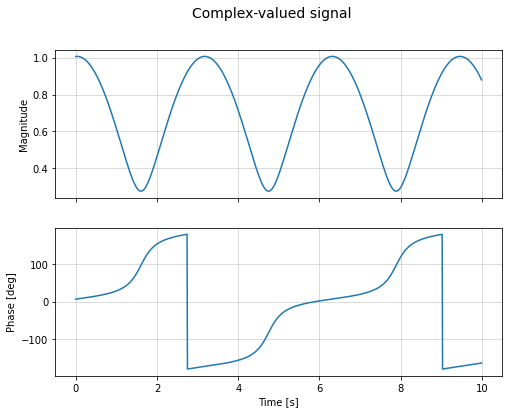

(<Figure size 576x432 with 2 Axes>,
 array([<AxesSubplot:ylabel='Magnitude'>,
        <AxesSubplot:xlabel='Time [s]', ylabel='Phase [deg]'>],
       dtype=object))

In [8]:
# default: Bode plot - magnitude and phase
sc.display()

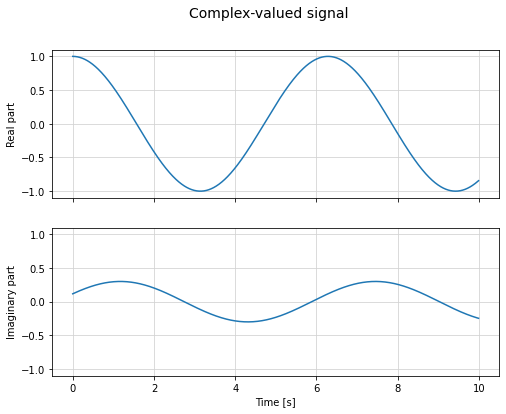

(<Figure size 576x432 with 2 Axes>,
 array([<AxesSubplot:ylabel='Real part'>,
        <AxesSubplot:xlabel='Time [s]', ylabel='Imaginary part'>],
       dtype=object))

In [9]:
# IQ plot (real and imaginary components separated)
sc.display('iq')

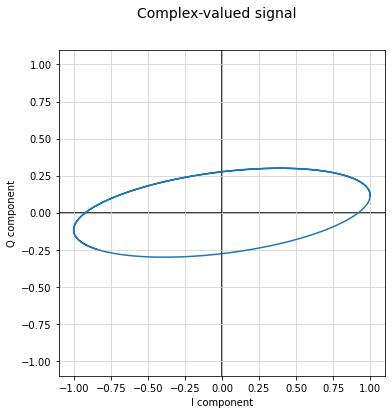

In [10]:
# Nyquist plot
_ = sc.display('nyquist')

## Transition to frequency domain

In [11]:
# Power spectral density: FreqDomainSignal
psd = s12.psd()
type(psd)

signum.core.containers.FreqDomainSignal

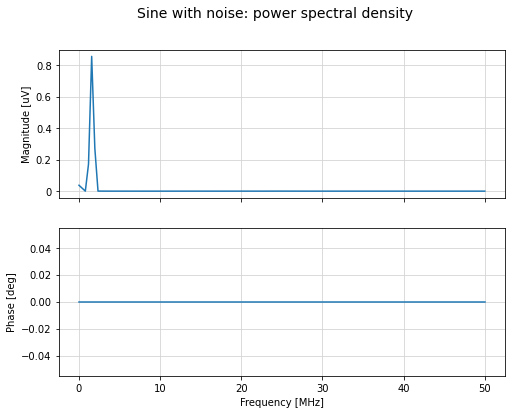

In [12]:
_ = psd.display()

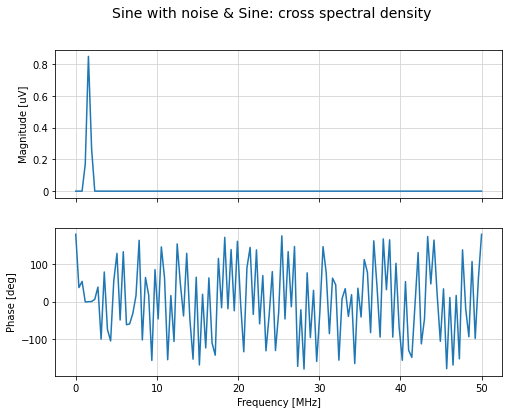

In [13]:
# Cross-spectral density of sine with noise and the sine itself
_ = s12.csd(s1).display()

### Fourier transform

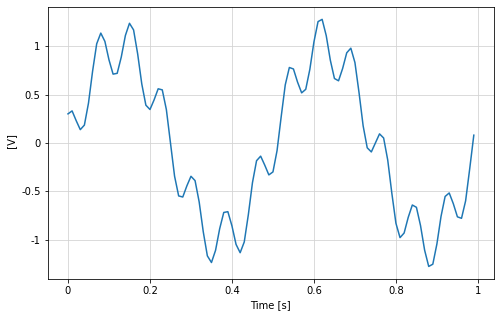

(<Figure size 576x360 with 1 Axes>,
 array([<AxesSubplot:xlabel='Time [s]', ylabel=' [V]'>], dtype=object))

In [14]:
# let's define a time-domain signal
fs = 100
x = 2 * np.pi * np.arange(100) / fs
s = np.sin(2 * x) + 0.3 * np.cos(13 * x)
s = TimeDomainSignal(s, f_sampling=fs, unit='V')
s.display()

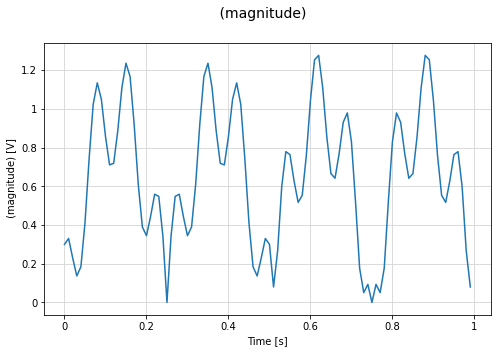

(<Figure size 576x360 with 1 Axes>,
 array([<AxesSubplot:xlabel='Time [s]', ylabel=' (magnitude) [V]'>],
       dtype=object))

In [15]:
# have a look at the absolute value
s.magnitude.display()

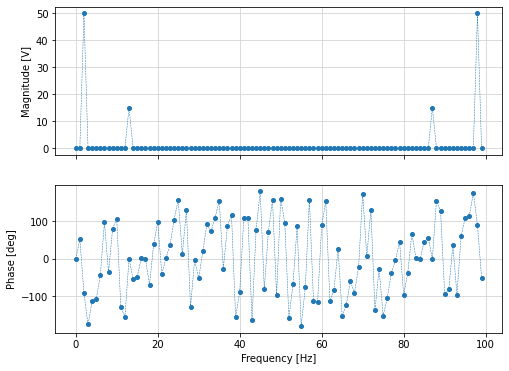

In [16]:
# Fourier transform -> frequency-domain signal
f = s.fft()
_ = f.display(lw=0.5, ls='--', marker='o', ms=4)

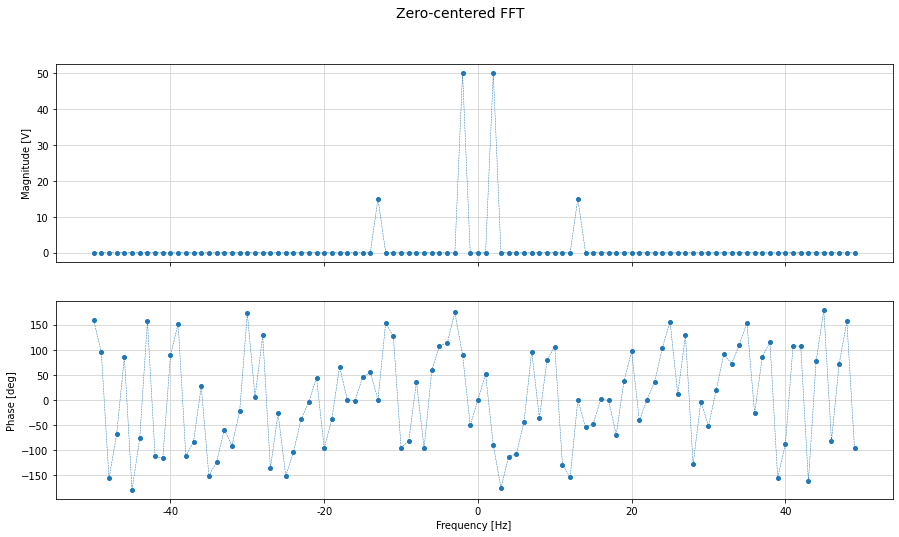

In [17]:
# shift the centre of the spectrum to 0
f_zero_centered = f.fftshift()
_ = f_zero_centered.display(lw=0.5, ls='--', marker='o', ms=4, figsize=(15, 8), title='Zero-centered FFT')

The first element of the array appears not to be the zero-frequency term (based on the frequency axis: -50.00 Hz)


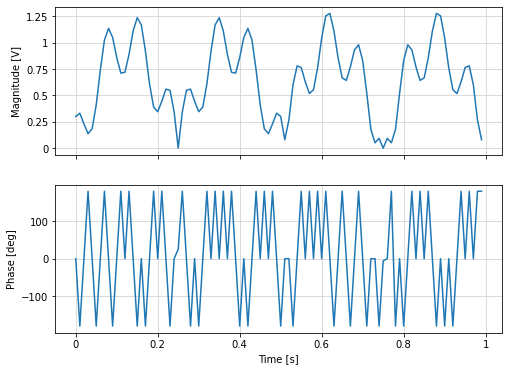

In [18]:
# Inverse Fourier transform
# if performed on a signal whose firs frequency is not 0, a warning is displayed
t_inverse = f_zero_centered.ifft()
_ = t_inverse.display()

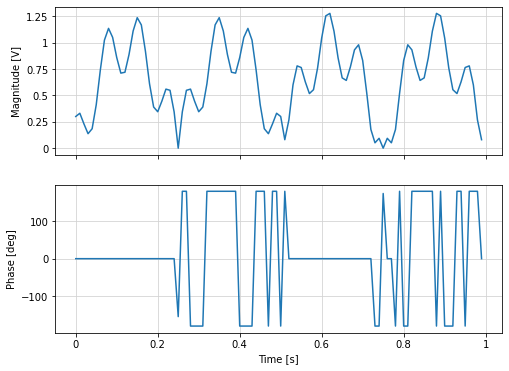

In [19]:
# inverse fft shift places the zero frequency term back at the beginning to perform the inverse Fourier transform correctly
t_inverse = f_zero_centered.ifftshift().ifft()
_ = t_inverse.display()

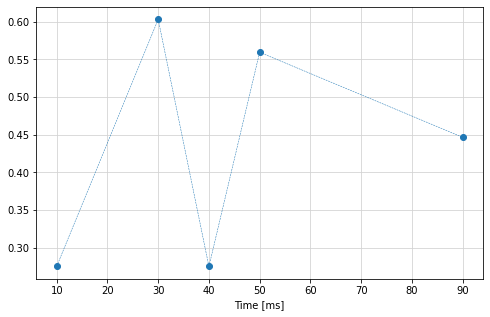

ERROR: Cannot perform a Fourier transform on an array of non-equally spaced samples


In [20]:
# To perform a Fourier transform, the samples in the time domain signal should be equally spaced

s = TimeDomainSignal(np.random.rand(10), f_sampling=100)
s = s[np.array([1, 3, 4, 5, 9])]
s.display(marker='o', ls='--', lw=0.5)

try:
    s.fft()
except ValueError as e:
    print("ERROR:", e)